In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('../kdd2004.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,-1
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,-1
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,-1
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,-1
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,-1


In [4]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', 'target'],
      dtype='object')

In [6]:
df.target.unique()

array([-1,  1])

In [9]:
df.target = df.target.map({-1:0, 1:1})

In [10]:
df.target

0         0
1         0
2         0
3         0
4         0
         ..
145746    0
145747    0
145748    1
145749    0
145750    1
Name: target, Length: 145751, dtype: int64

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,0
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,0
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,0
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,0
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,0


In [13]:
df.shape

(145751, 75)

In [16]:
df.target.value_counts() / len(df)

target
0    0.991108
1    0.008892
Name: count, dtype: float64

In [17]:
df.target.value_counts(normalize=True)

target
0    0.991108
1    0.008892
Name: proportion, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [23]:
X = df.drop(columns = 'target', axis=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,-8.0,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,-6.0,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,7.0,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,6.0,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,-14.0,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23


In [25]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)

In [27]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((102025, 74), (102025,), (43726, 74), (43726,))

# Baseline: predict the majority class

In [31]:
y_train_base = pd.Series(np.zeros(len(y_train)))
y_train_base.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

In [35]:
y_test_base = pd.Series(np.zeros(len(y_test)))
y_test_base.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

# Training the model

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
?RandomForestClassifier

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeClassifier`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the

In [39]:
rf = RandomForestClassifier(n_estimators = 100, max_depth=2, random_state =0, n_jobs=4)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_jobs=4, random_state=0)

In [40]:
dir(rf)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_compute_oob_predictions',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_estimators_indices',
 '_get_metadata_request',
 '_get_oob_predictions',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_n_samples',
 '_n_samples_bootstrap',
 '_parameter_c

In [45]:
y_train_rf = rf.predict_proba(X_train)[:,1]
y_train_rf[:5]

array([0.00424303, 0.00355334, 0.00355334, 0.00355334, 0.00355334])

In [48]:
y_test_rf = rf.predict_proba(X_test)[:,1]
y_test_rf[:5]

array([0.0037091 , 0.00355334, 0.50609821, 0.00355334, 0.00366222])

# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
?LogisticRegression

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='deprecated',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
floats for optimal performance; any other input format will be converted
(and copied).

The 'newton-cg', 'sag', and 'lbfgs' solvers support only L2 regularization
with primal formulation, or no regularization. The 'liblinear' solver
supports both L1 and L2 regularization, with a dual formulation only for


In [ ]:
#max_iter set to 1000. This is needed by the DiscriminationThreshold to reach convergence
lr = LogisticRegression(random_state=0, max_iter=1000)
lr.fit(X_train, y_train)

/home/max/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=0)

In [55]:
y_train_lr = lr.predict_proba(X_train)[:,1]
y_train_lr[:5]

array([5.21452107e-03, 1.44830373e-02, 2.41116186e-06, 7.87221855e-04,
       3.96762709e-04])

In [60]:
y_test_lr = lr.predict_proba(X_test)[:5,1]
y_test_lr[:5]

array([1.89555748e-04, 4.64285202e-07, 8.88925474e-01, 8.76667539e-04,
       3.23121575e-04])

# Precision

In [61]:
import sklearn.metrics

In [62]:
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_log_loss_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_sco

In [63]:
from sklearn.metrics import precision_score

In [65]:
y_test_base

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
43721    0.0
43722    0.0
43723    0.0
43724    0.0
43725    0.0
Length: 43726, dtype: float64

In [66]:
print(f"""
    Precision Baseline: {precision_score(y_test, y_test_base)}
    RF Precision score: {precision_score(y_test, rf.predict(X_test))}
    LR Precision score: {precision_score(y_test, lr.predict(X_test))}
      """)


    Precision Baseline: 0.0
    RF Precision score: 0.995850622406639
    LR Precision score: 0.9602888086642599
      


/home/max/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Recall

In [67]:
from sklearn.metrics import recall_score

In [68]:
print(f"""
Baseline recall score: {recall_score(y_test, y_test_base)}
RF recall score: {recall_score(y_test, rf.predict(X_test))}
LR recall score: {recall_score(y_test, lr.predict(X_test))}      """)


Baseline recall score: 0.0
RF recall score: 0.5925925925925926
LR recall score: 0.6567901234567901      


In [69]:
?recall_score

Signature:
recall_score(
    y_true,
    y_pred,
    *,
    labels=None,
    pos_label=1,
    average='binary',
    sample_weight=None,
    zero_division='warn',
)
Docstring:
Compute the recall.

The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
true positives and ``fn`` the number of false negatives. The recall is
intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0.

Support beyond term:`binary` targets is achieved by treating :term:`multiclass`
and :term:`multilabel` data as a collection of binary problems, one for each
label. For the :term:`binary` case, setting `average='binary'` will return
recall for `pos_label`. If `average` is not `'binary'`, `pos_label` is ignored
and recall for both classes are computed then averaged or both returned (when
`average=None`). Similarly, for :term:`multiclass` and :term:`multilabel` targets,
recall for all `labels` are either returned or averaged dependin

In [72]:
print(f"""
Baseline recall score: {recall_score(y_test, y_test_base,pos_label=1)}
RF recall score: {recall_score(y_test, rf.predict(X_test), pos_label=1)}
LR recall score: {recall_score(y_test, lr.predict(X_test), pos_label=1)}      """)


Baseline recall score: 0.0
RF recall score: 0.5925925925925926
LR recall score: 0.6567901234567901      


# F-measure or F1 score

In [73]:
import sklearn.metrics

In [74]:
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_log_loss_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_sco

In [75]:
from sklearn.metrics import f1_score

In [76]:
print(f"""
Baseline F1 score: {f1_score(y_test, y_test_base)}
RF F1 score: {f1_score(y_test, rf.predict(X_test))}
LR F1 score: {f1_score(y_test, lr.predict(X_test))}
      """)


Baseline F1 score: 0.0
RF F1 score: 0.7430340557275542
LR F1 score: 0.7800586510263929
      


In [77]:
?f1_score

Signature:
f1_score(
    y_true,
    y_pred,
    *,
    labels=None,
    pos_label=1,
    average='binary',
    sample_weight=None,
    zero_division='warn',
)
Docstring:
Compute the F1 score, also known as balanced F-score or F-measure.

The F1 score can be interpreted as a harmonic mean of the precision and
recall, where an F1 score reaches its best value at 1 and worst score at 0.
The relative contribution of precision and recall to the F1 score are
equal. The formula for the F1 score is:

.. math::
    \text{F1} = \frac{2 * \text{TP}}{2 * \text{TP} + \text{FP} + \text{FN}}

Where :math:`\text{TP}` is the number of true positives, :math:`\text{FN}` is the
number of false negatives, and :math:`\text{FP}` is the number of false positives.
F1 is by default
calculated as 0.0 when there are no true positives, false negatives, or
false positives.

Support beyond :term:`binary` targets is achieved by treating :term:`multiclass`
and :term:`multilabel` data as a collection of binary problems

In [79]:
print(f"""
Baseline F1 score: {f1_score(y_test, y_test_base, pos_label=1)}
RF F1 score: {f1_score(y_test, rf.predict(X_test),pos_label=1)}
LR F1 score: {f1_score(y_test, lr.predict(X_test),pos_label=1)}
      """)


Baseline F1 score: 0.0
RF F1 score: 0.7430340557275542
LR F1 score: 0.7800586510263929
      


In [109]:
from sklearn.metrics import precision_recall_fscore_support

In [110]:
?precision_recall_fscore_support

Signature:
precision_recall_fscore_support(
    y_true,
    y_pred,
    *,
    beta=1.0,
    labels=None,
    pos_label=1,
    average=None,
    warn_for=('precision', 'recall', 'f-score'),
    sample_weight=None,
    zero_division='warn',
)
Docstring:
Compute precision, recall, F-measure and support for each class.

The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
true positives and ``fp`` the number of false positives. The precision is
intuitively the ability of the classifier not to label a negative sample as
positive.

The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
true positives and ``fn`` the number of false negatives. The recall is
intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of
the precision and recall, where an F-beta score reaches its best
value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a 

In [112]:
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, rf.predict(X_test), pos_label=1)

print(precision, recall, f1_score, support)

[0.99620559 0.99585062] [0.99997692 0.59259259] [0.99808769 0.74303406] [43321   405]


In [80]:
import yellowbrick

In [81]:
dir(yellowbrick)

['ClassBalance',
 'ClassificationScoreVisualizer',
 'ROCAUC',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '__version_info__',
 '_orig_rc_params',
 'anscombe',
 'base',
 'bestfit',
 'classifier',
 'color_palette',
 'contrib',
 'datasaurus',
 'draw',
 'exceptions',
 'get_version',
 'mpl',
 'reset_defaults',
 'reset_orig',
 'set_aesthetic',
 'set_color_codes',
 'set_palette',
 'set_style',
 'style',
 'target',
 'utils',
 'version']

In [82]:
import yellowbrick.classifier

In [83]:
dir(yellowbrick.classifier)

['ClassBalance',
 'ClassPredictionError',
 'ClassificationReport',
 'ClassificationScoreVisualizer',
 'ConfusionMatrix',
 'DiscriminationThreshold',
 'PRCurve',
 'PrecisionRecallCurve',
 'ROCAUC',
 'ScoreVisualizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'base',
 'class_balance',
 'class_prediction_error',
 'classification_report',
 'confusion_matrix',
 'discrimination_threshold',
 'prcurve',
 'precision_recall_curve',
 'roc_auc',
 'rocauc',
 'threshold']

In [84]:
from yellowbrick.classifier import ClassificationReport, DiscriminationThreshold

In [85]:
?ClassificationReport

Init signature:
ClassificationReport(
    estimator,
    ax=None,
    classes=None,
    cmap='YlOrRd',
    support=None,
    encoder=None,
    is_fitted='auto',
    force_model=False,
    colorbar=True,
    fontsize=None,
    **kwargs,
)
Docstring:     
Classification report that shows the precision, recall, F1, and support scores
for the model. Integrates numerical scores as well as a color-coded heatmap.

Parameters
----------
estimator : estimator
    A scikit-learn estimator that should be a classifier. If the model is
    not a classifier, an exception is raised. If the internal model is not
    fitted, it is fit when the visualizer is fitted, unless otherwise specified
    by ``is_fitted``.

ax : matplotlib Axes, default: None
    The axes to plot the figure on. If not specified the current axes will be
    used (or generated if required).

classes : list of str, defult: None
    The class labels to use for the legend ordered by the index of the sorted
    classes discovered in t

In [87]:
dir(visualizer)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_ax',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_decode_labels',
 '_displayed_scores',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_fig',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_labels',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_size',
 '_validate_data',
 '_validate_params',
 '_wrapped',
 'ax',
 'class_colors_',
 'classes',
 'cmap',
 'color',
 'colorbar'

In [92]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "DejaVu Sans"  # Change to a known font

/home/max/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


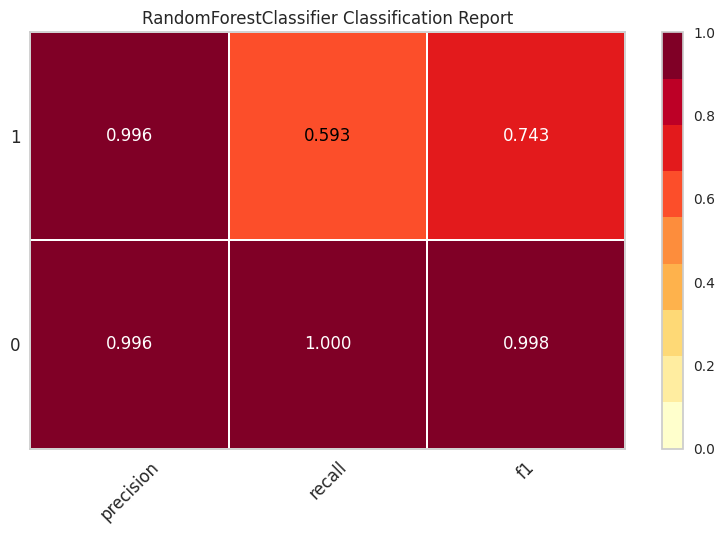

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [93]:
visualizer = ClassificationReport(rf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [94]:
from yellowbrick.classifier import ClassificationReport

/home/max/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


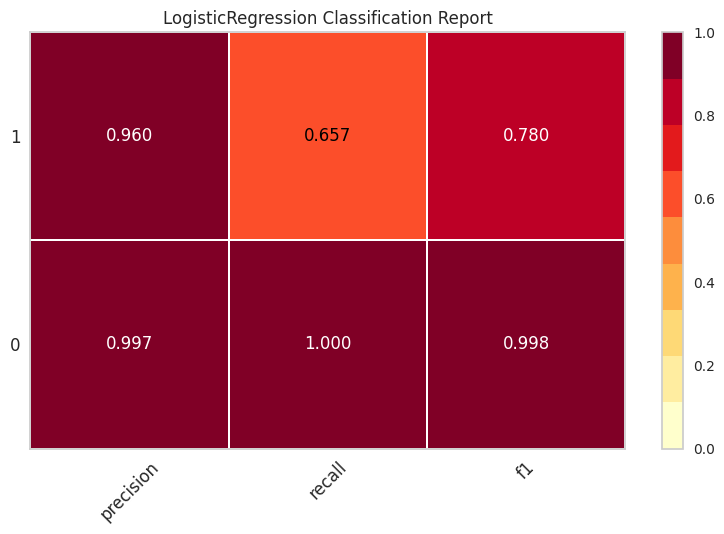

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [95]:
visualizer = ClassificationReport(lr)
visualizer.fit(X_train,y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [96]:
from yellowbrick.classifier import DiscriminationThreshold

In [97]:
?DiscriminationThreshold

Init signature:
DiscriminationThreshold(
    estimator,
    ax=None,
    n_trials=50,
    cv=0.1,
    fbeta=1.0,
    argmax='fscore',
    exclude=None,
    quantiles=array([0.1, 0.5, 0.9]),
    random_state=None,
    is_fitted='auto',
    force_model=False,
    **kwargs,
)
Docstring:     
Visualizes how precision, recall, f1 score, and queue rate change as the
discrimination threshold increases. For probabilistic, binary classifiers,
the discrimination threshold is the probability at which you choose the
positive class over the negative. Generally this is set to 50%, but
adjusting the discrimination threshold will adjust sensitivity to false
positives which is described by the inverse relationship of precision and
recall with respect to the threshold.

The visualizer also accounts for variability in the model by running
multiple trials with different train and test splits of the data. The
variability is visualized using a band such that the curve is drawn as the
median score of each tr

In [100]:
help(DiscriminationThreshold)

Help on class DiscriminationThreshold in module yellowbrick.classifier.threshold:

class DiscriminationThreshold(yellowbrick.base.ModelVisualizer)
 |  DiscriminationThreshold(estimator, ax=None, n_trials=50, cv=0.1, fbeta=1.0, argmax='fscore', exclude=None, quantiles=array([0.1, 0.5, 0.9]), random_state=None, is_fitted='auto', force_model=False, **kwargs)
 |  
 |  Visualizes how precision, recall, f1 score, and queue rate change as the
 |  discrimination threshold increases. For probabilistic, binary classifiers,
 |  the discrimination threshold is the probability at which you choose the
 |  positive class over the negative. Generally this is set to 50%, but
 |  adjusting the discrimination threshold will adjust sensitivity to false
 |  positives which is described by the inverse relationship of precision and
 |  recall with respect to the threshold.
 |  
 |  The visualizer also accounts for variability in the model by running
 |  multiple trials with different train and test splits of

/home/max/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/max/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


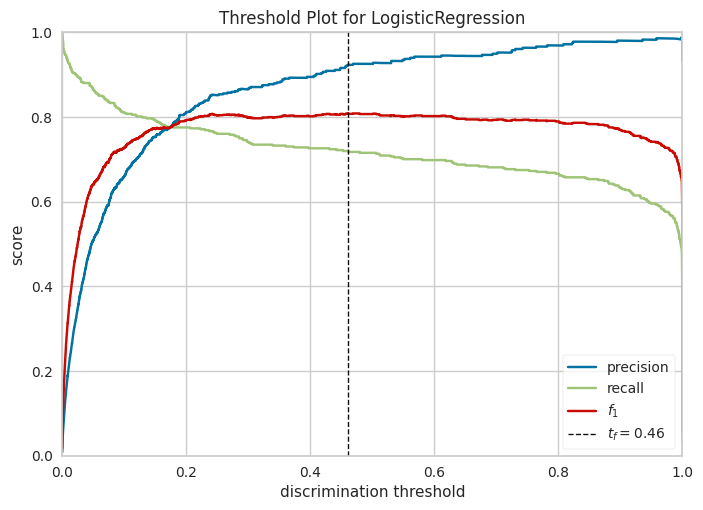

<Axes: title={'center': 'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [105]:
visualizer = DiscriminationThreshold(lr, n_trials=1, cv=0.5, argmax='fscore', random_state=0, is_fitted='auto', exclude='queue_rate')
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [106]:
help(DiscriminationThreshold)

Help on class DiscriminationThreshold in module yellowbrick.classifier.threshold:

class DiscriminationThreshold(yellowbrick.base.ModelVisualizer)
 |  DiscriminationThreshold(estimator, ax=None, n_trials=50, cv=0.1, fbeta=1.0, argmax='fscore', exclude=None, quantiles=array([0.1, 0.5, 0.9]), random_state=None, is_fitted='auto', force_model=False, **kwargs)
 |  
 |  Visualizes how precision, recall, f1 score, and queue rate change as the
 |  discrimination threshold increases. For probabilistic, binary classifiers,
 |  the discrimination threshold is the probability at which you choose the
 |  positive class over the negative. Generally this is set to 50%, but
 |  adjusting the discrimination threshold will adjust sensitivity to false
 |  positives which is described by the inverse relationship of precision and
 |  recall with respect to the threshold.
 |  
 |  The visualizer also accounts for variability in the model by running
 |  multiple trials with different train and test splits of